In [42]:
import pandas as pd
import pickle
from preprocessor import preProcessSerie

isis = pd.read_csv('isisfanboy.csv')
about = pd.read_csv('aboutisis.csv')

isis = isis[:17392]
about = about[:17392]
#El máximo que puedo usar es 17392

dataframe = pd.concat([isis, about])

dfmc = pickle.load( open( "sentimentsdf.p", "rb" ) )

#dataframe["sentiments"] = dfmc
X = dataframe["tweets"].values

print(type(X[0]))
print(X[0])



<class 'str'>
ENGLISH TRANSLATION: 'A MESSAGE TO THE TRUTHFUL IN SYRIA - SHEIKH ABU MUHAMMED AL MAQDISI: https://justpaste.it/MESSAGETOTHETRUTHFULINSYRIA https://twitter.com/account/suspended 


In [59]:
dfmc = pickle.load( open( "mcsentiments.p", "rb" ) )

#We create a counter for going across the list
counter = 0
#Empty dict
d = {}

for tweet in X:
    #Fill in the entries one by one
    d[tweet] = dfmc[counter]
    counter = counter + 1
    if counter < 20:
        print(tweet)
        print(d[tweet])
        print(dfmc[counter - 1])
        
print(len(X))
print(len(dfmc))
print(len(d))


ENGLISH TRANSLATION: 'A MESSAGE TO THE TRUTHFUL IN SYRIA - SHEIKH ABU MUHAMMED AL MAQDISI: https://justpaste.it/MESSAGETOTHETRUTHFULINSYRIA https://twitter.com/account/suspended 
P
P
ENGLISH TRANSLATION: SHEIKH FATIH AL JAWLANI 'FOR THE PEOPLE OF INTEGRITY, SACRIFICE IS EASY' https://justpaste.it/SHEIKHALJAWLANINEWMESSAGE https://twitter.com/account/suspended 
P
P
ENGLISH TRANSLATION: FIRST AUDIO MEETING WITH SHEIKH FATIH AL JAWLANI (HA): https://justpaste.it/MeetingWithSheikhFatih https://twitter.com/account/suspended 
NONE
NONE
ENGLISH TRANSLATION: SHEIKH NASIR AL WUHAYSHI (HA), LEADER OF AQAP: 'THE PROMISE OF VICTORY': https://justpaste.it/AQAPPromiseOfVictory https://twitter.com/account/suspended 
P
P
ENGLISH TRANSLATION: AQAP: 'RESPONSE TO SHEIKH BAGHDADIS STATEMENT 'ALTHOUGH THE DISBELIEVERS DISLIKE IT.' https://justpaste.it/i4xj 
N
N
THE SECOND CLIP IN A DA'WAH SERIES BY A SOLDIER OF JN: Video Link :https://www.youtube.com/watch?v=UgjnKYgfxR4%26feature=youtu.be https://twitter.c

In [60]:
pickle.dump(d, open("sentdicc.p", "wb"))

In [1]:
import pickle
sentdicc = pickle.load( open( "sentdicc.p", "rb" ) )

In [5]:
import pandas as pd
isis = pd.read_csv('isisfanboy.csv')
about = pd.read_csv('aboutisis.csv')

about = isis['tweets'][:17392].values

pm = 0
p = 0
nm = 0
n = 0
neu = 0
none = 0

for i in about:
    sent = ""
    try:
        sent = sentdicc[i]
    except KeyError:
        sent = "NONE"
        
    if(sent == "P+"):
        p = p + 1
    if(sent == "P"):
        p = p + 1
    if(sent == "N+"):
        n = n + 1
    if(sent == "N"):
        n = n + 1
    if(sent == "NEU"):
        neu = neu + 1
    if(sent == "NONE"):
        none = none + 1

print("P+")
print(pm)
print("P")
print(p)
print("NM")
print(nm)
print("N")
print(n)
print("NEU")
print(neu)
print("NONE")
print(none)

P+
0
P
3584
NM
0
N
6700
NEU
500
NONE
6607


In [6]:
c = 250
tweets = []
while c <= 6750:
    tweets.append(c)
    c = c + 250

y = []
y.append(p)
y.append(neu)
y.append(n)

print(y)

[3584, 500, 6700]


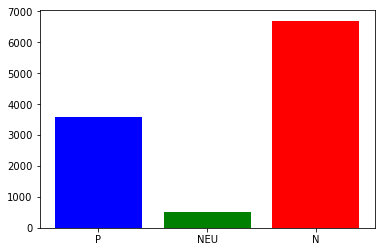

In [7]:
import matplotlib.pyplot as plt
import numpy as np

x = [1,2,3]

#fig, ax = plt.subplots()
plt.bar(x, y, color=["b","g","r"])
plt.xticks(x, ('P', 'NEU', 'N'))
plt.show()